In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

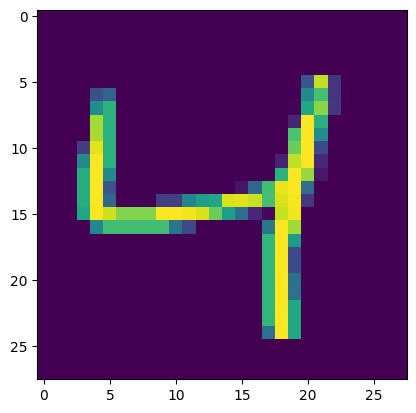

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2821 - accuracy: 0.9178 - val_loss: 0.1380 - val_accuracy: 0.9591
Epoch 2/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1177 - accuracy: 0.9645 - val_loss: 0.1053 - val_accuracy: 0.9702
Epoch 3/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0804 - accuracy: 0.9746 - val_loss: 0.0971 - val_accuracy: 0.9712
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0616 - accuracy: 0.9802 - val_loss: 0.0911 - val_accuracy: 0.9735
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0911 - val_accuracy: 0.9753
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.1059 - val_accuracy: 0.9721
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.1115 - val_accurac

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9744

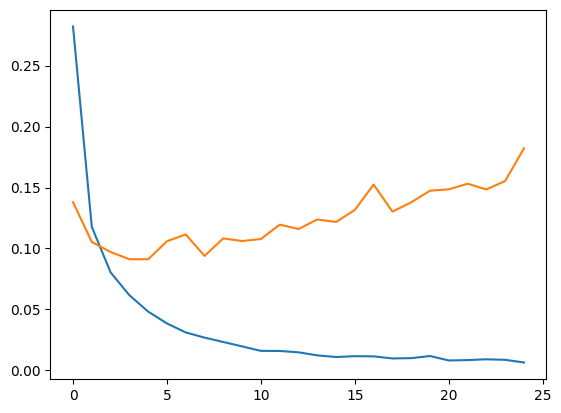

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

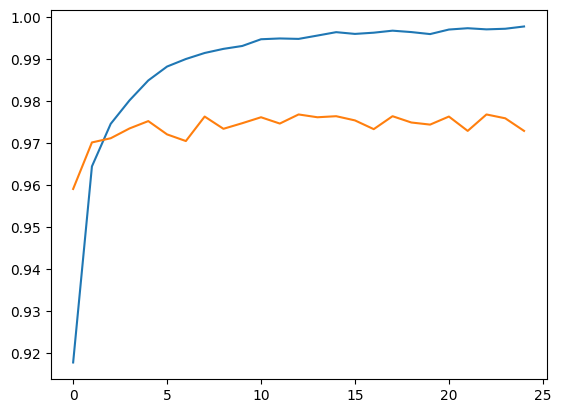

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

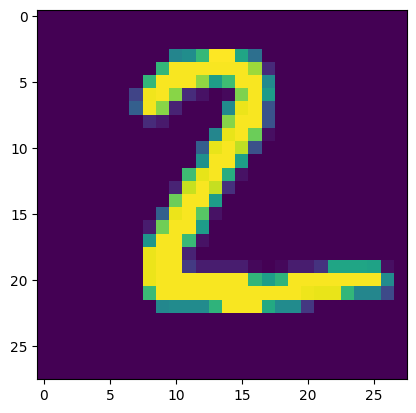

In [ ]:
plt.imshow(X_test[60])

1/1 [==============================] - 0s 27ms/step


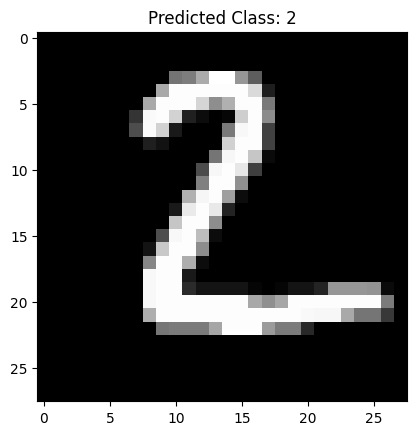

In [ ]:
pred_pic = model.predict(X_test[1].reshape(1, 28, 28))

# Assuming the model output is a one-hot encoded vector and you want to display the class probabilities
pred_class_probabilities = pred_pic[0]
pred_class = pred_class_probabilities.argmax()

plt.imshow(X_test[1], cmap='gray')  # Display the original image
plt.title(f"Predicted Class: {pred_class}")
plt.show()